<a href="https://colab.research.google.com/github/axshay007/Semi-Supervised-Learning-through-GANs/blob/main/Semi_Supervised_Learning_through_GANs_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

changing the directory to content for downloading and the data set in contant folder


### **About GANs**

### Generative Adversarial Networks (GANs) are a class of machine learning techniques that consist of two simultaneously trained models: one (the Generator) trained to generate fake data, and the other (the Discriminator) trained to discern the fake data from real examples.

### **What does it mean by 'Generative'?**
### The word generative indicates the overall purpose of the model: creating new data.The data that a GAN will learn to generate depends on the choice of the training set. For example, if we want a GAN to synthesize images that look like Leonardo da Vinci’s, we would use a training dataset of da Vinci’s artwork.

### **The meaning of Adversarial**

### The term adversarial points to the game-like, competitive dynamic between the two models that constitute the GAN framework: the Generator and the Discriminator. The Generator’s goal is to create examples that are indistinguishable from the real data in the training set. In our example, this means producing paintings that look just like da Vinci’s. The Discriminator’s objective is to distinguish the fake examples produced by the Generator from the real examples coming from the training dataset. In our example, the Discriminator plays the role of an art expert assessing the authenticity of paintings believed to be da Vinci’s. The two networks are continually trying to outwit each other: the better the Generator gets at creating convincing data, the better the Discriminator needs to be at distinguishing real examples from the fake ones.

### Finally, the word networks indicates the class of machine learning models most commonly used to represent the Generator and the Discriminator: **neural networks**. Depending on the complexity of the GAN implementation, these can range from simple feed-forward neural networks to convolutional neural networks or even more complex variants, such as the U-Net.
  

### In more technical terms, the Generator’s goal is to produce examples that capture the characteristics of the training dataset, so much so that the samples it generates look indistinguishable from the training data. The Generator can be thought of as an object recognition model in reverse. Object recognition algorithms learn the patterns in images to discern an image’s content. Instead of recognizing the patterns, **the Generator learns to create them essentially from scratch; indeed, the input into the Generator is often no more than a vector of random numbers.**

### **How Generator of the GAN learns?**

### The Generator learns through the feedback it receives from the Discriminator’s classifications. The Discriminator’s goal is to determine whether a particular example is real (coming from the training dataset) or fake (created by the Generator). Accordingly, each time the Discriminator is fooled into classifying a fake image as real, the Generator knows it did something well. Conversely, each time the Discriminator correctly rejects a Generator-produced image as fake, the Generator receives the feedback that it needs to improve.

In [ ]:
from google.colab import drive # read from and write to files in your Google Drive directly from your Google Colab notebooks.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cd /content

In [ ]:
!wget https://lp-prod-resources.s3.amazonaws.com/278/45149/2021-02-19-19-47-43/MelanomaDetection.zip

--2023-10-30 14:21:19--  https://lp-prod-resources.s3.amazonaws.com/278/45149/2021-02-19-19-47-43/MelanomaDetection.zip
Resolving lp-prod-resources.s3.amazonaws.com (lp-prod-resources.s3.amazonaws.com)... 52.218.179.41, 52.92.249.217, 52.92.210.185, ...
Connecting to lp-prod-resources.s3.amazonaws.com (lp-prod-resources.s3.amazonaws.com)|52.218.179.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6744318 (6.4M) [application/octet-stream]
Saving to: ‘MelanomaDetection.zip’

MelanomaDetection.z 100%[===================>]   6.43M  8.89MB/s    in 0.7s    

2023-10-30 14:21:20 (8.89 MB/s) - ‘MelanomaDetection.zip’ saved [6744318/6744318]



In [ ]:
#eunziping the data set
!unzip /content/MelanomaDetection.zip

Streaming output truncated to the last 5000 lines.
  inflating: MelanomaDetection/MelanomaDetection/unlabeled/2814.jpg  
  inflating: MelanomaDetection/MelanomaDetection/unlabeled/2815.jpg  
  inflating: MelanomaDetection/MelanomaDetection/unlabeled/2816.jpg  
  inflating: MelanomaDetection/MelanomaDetection/unlabeled/2817.jpg  
  inflating: MelanomaDetection/MelanomaDetection/unlabeled/2818.jpg  
  inflating: MelanomaDetection/MelanomaDetection/unlabeled/2819.jpg  
  inflating: MelanomaDetection/MelanomaDetection/unlabeled/282.jpg  
  inflating: MelanomaDetection/MelanomaDetection/unlabeled/2820.jpg  
  inflating: MelanomaDetection/MelanomaDetection/unlabeled/2821.jpg  
  inflating: MelanomaDetection/MelanomaDetection/unlabeled/2822.jpg  
  inflating: MelanomaDetection/MelanomaDetection/unlabeled/2823.jpg  
  inflating: MelanomaDetection/MelanomaDetection/unlabeled/2824.jpg  
  inflating: MelanomaDetection/MelanomaDetection/unlabeled/2825.jpg  
  inflating: MelanomaDetection/MelanomaD

In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import shutil

In [ ]:
# Set the path to the melanocytic nevi dataset directory
data_dir = '/content/MelanomaDetection/MelanomaDetection/labeled'

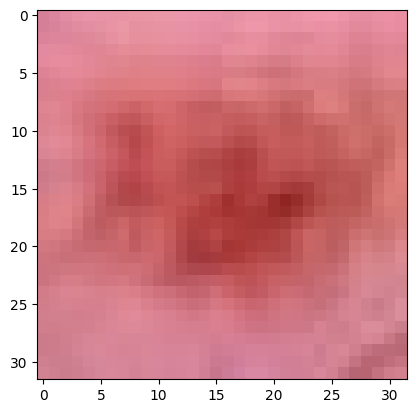

In [ ]:
image_path = "/content/MelanomaDetection/MelanomaDetection/labeled/0_0.jpg"

# load the image using matplotlib
img = mpimg.imread(image_path)

# display the image
plt.imshow(img)
plt.show()


Original Image size

In [ ]:
img.shape

(32, 32, 3)

Data directory to be consulted in upcoming cells

In [ ]:
data_dir

'/content/MelanomaDetection/MelanomaDetection/labeled'

**Data preparation:**

The dataset should be split into two sets: labeled and unlabeled.

The labeled set should contain an equal number of melanoma and benign images. The unlabeled set can be much larger.

The images should be preprocessed to ensure that they are all the same size and format.

Data augmentation techniques is be used to increase the size of the labeled dataset. This can help to improve the performance of the model.

## Dataset Separated into Benign0 and Malignant1 folders

In [ ]:
# Source folder path
src_folder = '/content/MelanomaDetection/MelanomaDetection/labeled'

# Destination folder paths for two subfolders
Malignant1 = "/content/MelanomaDetection/MelanomaDetection/labeled/Malignant1/"
Benign0 = "/content/MelanomaDetection/MelanomaDetection/labeled/Benign0/"

# Create the two subfolders if they don't exist
os.makedirs(Malignant1, exist_ok=True)
os.makedirs(Benign0, exist_ok=True)

# Loop through files in the source folder
for filename in os.listdir(src_folder):
    src_filepath = os.path.join(src_folder, filename)
    if os.path.isfile(src_filepath):  # Only process files, not directories
        # Example condition for splitting into two subfolders
        if '1.jpg' in filename:
            dst_filepath = os.path.join(Malignant1, filename)
        else:
            dst_filepath = os.path.join(Benign0, filename)
        # Move file to the appropriate subfolder
        shutil.move(src_filepath, dst_filepath)

In [ ]:
# Define the image size for preprocessing
img_size = img.shape

# Load the melanoma and non-melanoma images
melanoma_dir = os.path.join(data_dir, 'Benign0')
non_melanoma_dir = os.path.join(data_dir, 'Malignant1')

print("Melonoma Image Generation starts")
melanoma_images = []
i=0
for file_name in os.listdir(melanoma_dir):
    img = cv2.imread(os.path.join(melanoma_dir, file_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_size=tuple(img_size[:2])  # Convert from BGR to RGB color format
    img = cv2.resize(img, img_size[:2])  # Resize to desired size
    melanoma_images.append(img)
    i+=1

print(f"Melonoma Images generated for {i} images")


print("Non Melonoma Image Generation starts")
non_melanoma_images = []
i=0
for file_name in os.listdir(non_melanoma_dir):
    img = cv2.imread(os.path.join(non_melanoma_dir, file_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_size=tuple(img_size[:2])
    img = cv2.resize(img, img_size)
    non_melanoma_images.append(img)
    i+=1

print(f"Non Melonoma Images generated for {i} images")

# Combine the labeled melanoma and non-melanoma images into a single labeled dataset


Melonoma Image Generation starts
Melonoma Images generated for 100 images
Non Melonoma Image Generation starts
Non Melonoma Images generated for 100 images


In [ ]:
!pip install keras-utils


  Preparing metadata (setup.py) ... done
  Created wheel for keras-utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2632 sha256=39df05d53d15de0535b717c773cde6e8f8461ac9a727b5b81fba76e8b8bdae00
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras-utils


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import Adam
#from keras.utils import vis_utils
#from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
supervised_datagen = datagen.flow_from_directory(directory="/content/MelanomaDetection/MelanomaDetection/labeled",
                                                 target_size=(32,32),
                                                 classes=["Benign0","Malignant1"],
                                                 class_mode="binary",batch_size=64)

Found 200 images belonging to 2 classes.


In [ ]:
for images_mini_batch, labels_mini_batch in supervised_datagen:

  print(images_mini_batch.shape)
  print(labels_mini_batch)

  break

(64, 32, 32, 3)
[1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0.]


In [ ]:
unsupervised_datagen = datagen.flow_from_directory(directory="/content/MelanomaDetection/MelanomaDetection",
                                                   target_size=(32,32),
                                                   classes=["unlabeled"],
                                                   class_mode="binary",
                                                   batch_size=64)

Found 7018 images belonging to 1 classes.


In [ ]:
img.shape

(32, 32, 3)

In [ ]:
# Set the hyperparameters for the GAN
latent_dim = 100
img_size = (32,32,1)
batch_size = 32
epochs = 100
learning_rate = 0.0002
noise_dim=100


**Model training:**

Train a DCGAN on the unlabeled melanoma images.

This will generate a model that can learn the distribution of melanoma images.

The DCGAN can be trained by training discriminator and generator (on unlabeled melanoma images)

In [ ]:
# Define the discriminator model
def build_discriminator():
    input_image = Input(shape=img_size + (3,))
    x = Conv2D(32, kernel_size=5, strides=2, padding='same')(input_image)
    x = LeakyReLU(alpha=0.2)(x)
    x = Conv2D(64, kernel_size=5, strides=2, padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Conv2D(128, kernel_size=5, strides=2, padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Flatten()(x)
    x = Dropout(0.4)(x)
    #supervised output
    x = Dense(1, activation='sigmoid')(x)
    # supervised model
    s_output = Model(input_image, x)
    s_output.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])
    #unsupervised
    un_layer=Dense(1,activation='sigmoid')(x)
    #compiling the unsupervised model
    un_out=Model(input_image,un_layer)
    un_out.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
    return un_out,s_output

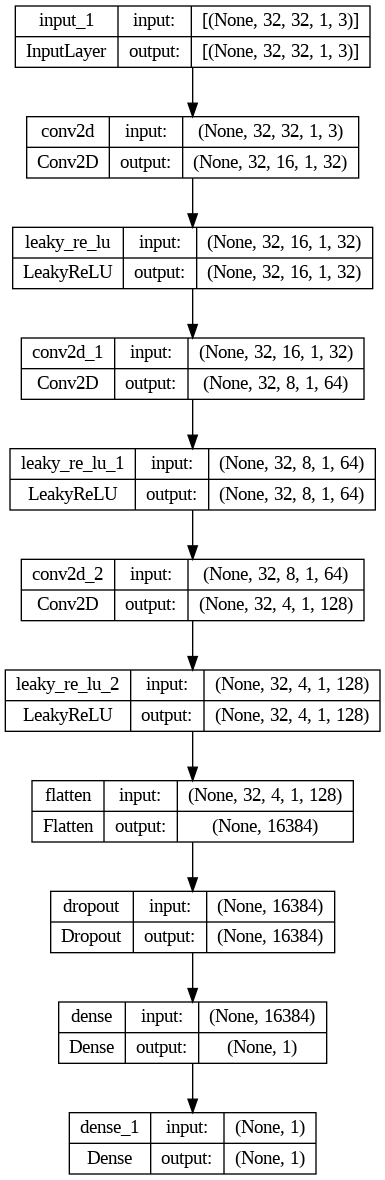

In [ ]:
un_model, sup_model = build_discriminator()
# plot the model
plot_model(sup_model, to_file='stacked_discriminator1_plot.png', show_shapes=True, show_layer_names=True)
plot_model(un_model, to_file='stacked_discriminator2_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
import tensorflow as tf

In [ ]:

# Define the generator model
def build_generator():
    input_latent = Input(shape=(latent_dim,))
    x = Dense(16 * 16 * 256)(input_latent)
    x = Reshape((16, 16, 256))(x)
    x = Conv2DTranspose(128, kernel_size=5, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Conv2DTranspose(64, kernel_size=5, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Conv2DTranspose(3, kernel_size=5, strides=2, padding='same', activation='sigmoid')(x)
    generator = Model(input_latent, x)
    return generator


In [ ]:
def generate_noise(n_samples, latent_dim):
    # Generating random noise instances
    x_input = np.random.randn(n_samples, latent_dim)
    return x_input

# Generating 10 noise instances of size 100
noise = generate_noise(10, latent_dim)

In [ ]:
"""# Connecting the generator and discriminator models to create a GAN model
gan_input = Input(shape=(latent_dim,))
gan_output = s_model(generator(gan_input))
gan_model = Model(gan_input,gan_output)

# Compiling the GAN model
gan_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002,beta_1=0.5))"""

"# Connecting the generator and discriminator models to create a GAN model\ngan_input = Input(shape=(latent_dim,))\ngan_output = s_model(generator(gan_input))\ngan_model = Model(gan_input,gan_output)\n\n# Compiling the GAN model\ngan_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002,beta_1=0.5))"

In [ ]:
# Define the generator and discriminator models
generator = build_generator()
discriminator = build_discriminator()

# Create the GAN model
class GAN(tf.keras.Model):
    def __init__(self, generator, discriminator):
        super(GAN, self).__init__()
        self.generator = generator
        self.discriminator = discriminator

    def call(self, inputs):
        # Generate fake images
        fake_images = self.generator(inputs)

        # Pass the fake and real images to the discriminator
        discriminator_output = self.discriminator(fake_images)

        return discriminator_output

# Compile the GAN model
gan = GAN(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())
"""
# Train the GAN model
gan.fit(noise, tf.ones((10, 1)), epochs=10)
"""

'\n# Train the GAN model\ngan.fit(noise, tf.ones((10, 1)), epochs=10)\n'

In [ ]:
# Train the discriminator
def train_discriminator(discriminator, dataset, epochs):
  for epoch in range(epochs):
      for batch in dataset:
          # Get the real images from the batch
          real_images = batch

          # Generate fake images
          noise = tf.random.normal([batch_size, latent_dim])
          fake_images = generator(noise)

          # Combine real and fake images into a single tensor
          combined_images = tf.concat([real_images, fake_images], axis=0)

                       # Create labels for the discriminator
          labels = tf.concat([tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0)

          # Add random noise to the labels - important trick!
          labels += 0.05 * tf.random.uniform(tf.shape(labels))

          # Train the discriminator
          with tf.GradientTape() as tape:
              predictions = discriminator(combined_images)
              d_loss = binary_crossentropy(labels, predictions)
              grads = tape.gradient(d_loss, discriminator.trainable_weights)
              discriminator_optimizer.apply_gradients(zip(grads, discriminator.trainable_weights))

In [ ]:
un_model, s_model = build_discriminator()
generator = build_generator()
for epoch in range(epochs):
  # Train on the supervised task
  s_loss, s_acc = s_model.train_on_batch(img_size, tf.ones((img_size, 1)))

  # Train on the unsupervised task
  noise = tf.random.normal((batch_size, 100))
  fake_images = generator.predict(noise)
  real_images = unsupervised_datagen.next()[0]

  # Train the discriminator on real images
  d_loss_real = un_model.train_on_batch(real_images, tf.ones((batch_size, 1)))

  # Train the discriminator on fake images
  d_loss_fake = un_model.train_on_batch(fake_images, tf.zeros((batch_size, 1)))

  # Calculate the total discriminator loss
  d_loss = (d_loss_real + d_loss_fake) / 2.0

  print(f'Epoch {epoch + 1}, Discriminator Loss: {d_loss}')


In [ ]:
# Train the generator model on the unlabeled melanoma images
for epoch in range(epochs):
  for i in range(0, len(fake_images), batch_size):
    # Generate a batch of fake images
    fake_latent = np.random.normal(0, 1, size=(batch_size, latent_dim))
    fake_images = generator.predict(fake_latent)

    # Train the generator model to fool the discriminator
    generator_loss = discriminator.train_on_batch(fake_images, tf.ones((batch_size, 1)))

    # Save the generator loss
    generator_losses.append(generator_loss)

# Save the generator model
generator.save('generator_model.h5')

**Model evaluation:** (Still working on it)

Evaluate the discriminator on the labeled melanoma and benign images.

This will assess the performance of the model on unseen data.

The discriminator can be evaluated using a variety of different metrics, such as accuracy, precision, and recall.

**Model deployment:**

Deploy the discriminator as a classifier to detect melanomas in new images.

The discriminator can be deployed on a variety of different platforms, such as a mobile app, a web server, or a cloud-based platform.

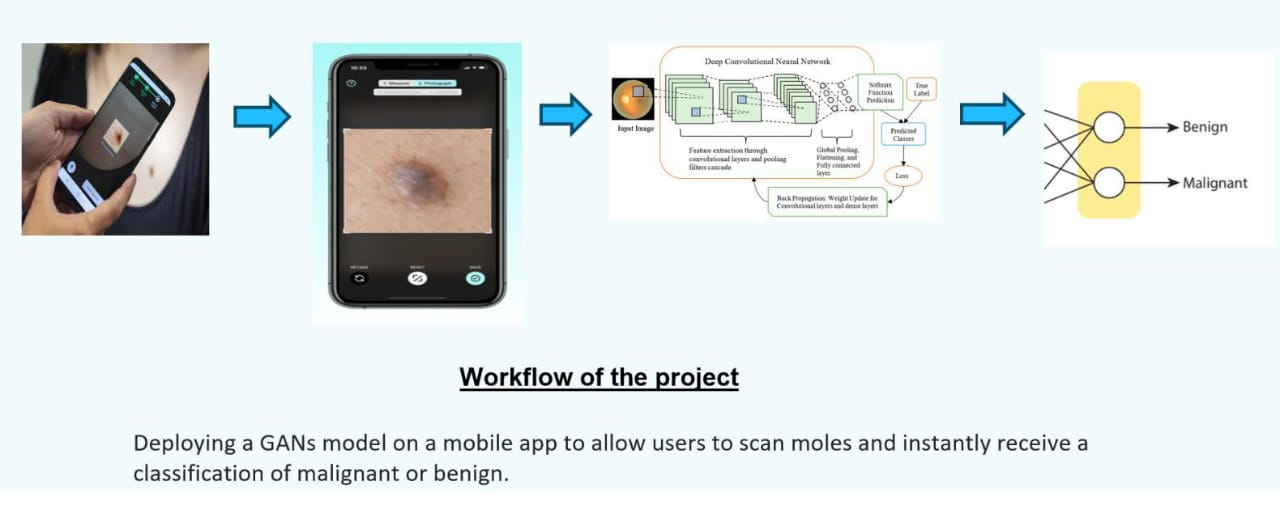

**Deploy the trained discriminator to a mobile app**